# A Simple Example of Clustering 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [2]:
data = pd.read_csv('Countries-exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

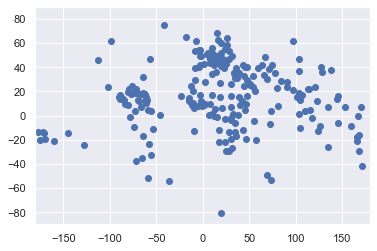

In [3]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [4]:
x = data.iloc[:,1:4]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Assume there are only two clusters. 

In [5]:
kmeans = KMeans(7)

In [6]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering Resutls

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 0, 6, 2, 5, 5, 5, 0, 2, 0, 4, 6, 3, 6, 2, 3, 5, 0, 6, 5, 1, 1,
       0, 5, 0, 2, 2, 5, 2, 5, 2, 2, 2, 2, 2, 3, 0, 6, 1, 5, 2, 0, 1, 1,
       6, 1, 4, 2, 6, 1, 2, 2, 2, 2, 5, 5, 5, 5, 6, 2, 5, 2, 1, 2, 5, 6,
       5, 5, 6, 5, 3, 2, 5, 5, 3, 1, 5, 5, 5, 1, 1, 1, 1, 1, 5, 2, 5, 2,
       3, 2, 3, 6, 2, 5, 2, 5, 3, 5, 0, 3, 6, 5, 0, 0, 5, 5, 5, 2, 5, 5,
       3, 0, 0, 6, 0, 3, 2, 2, 3, 5, 0, 0, 5, 1, 5, 2, 5, 0, 6, 5, 5, 5,
       3, 2, 1, 5, 5, 6, 0, 2, 3, 5, 1, 5, 0, 5, 0, 3, 6, 1, 2, 6, 6, 3,
       6, 3, 1, 3, 1, 2, 4, 5, 5, 0, 3, 3, 0, 0, 2, 4, 2, 3, 3, 3, 5, 2,
       3, 5, 2, 5, 4, 0, 5, 0, 6, 1, 0, 6, 6, 1, 3, 2, 1, 3, 1, 2, 5, 6,
       6, 2, 5, 1, 2, 5, 5, 5, 6, 2, 6, 5, 2, 1, 1, 0, 0, 0, 3, 4, 2, 5,
       5, 3, 6, 6, 5, 2, 2, 0, 5, 2, 2, 2, 2, 3, 3, 4, 4, 0, 6, 6, 6])

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,6
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,5
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,6
239,Zambia,27.774759,-13.458242,6


Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

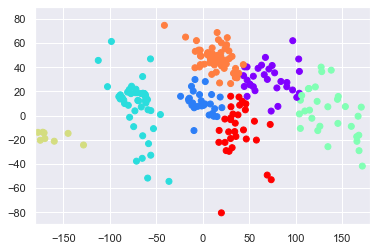

In [9]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

If you haven't, go back and play around with the number of clusters. 

Try 3, 7 and 8 and see if the results match your expectations!

## selecting no of cluster 
### WCSS

In [10]:
kmeans.inertia_

126932.39710026007

In [11]:
wcss = []

cl_num = 11
for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [12]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192212.4818949704,
 152258.09346318943,
 126950.26479100343,
 102891.39703473674,
 84945.19461239543,
 76571.81780508837]

### The elbow method

Text(0, 0.5, 'Within-cluster Sum of Squares')

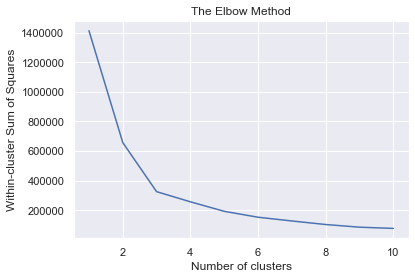

In [13]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')